<a href="https://colab.research.google.com/github/sisiraneha/stress-detection-using-decision-trees/blob/main/Copy_of_DecisionTreeClassifiers_to_Predict_Stress_Level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON|
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub

path = kagglehub.dataset_download("shubham803/stress-level-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.03M/1.03M [00:00<00:00, 1.53MB/s]

Extracting files...
Data source import complete.


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

!pip install --quiet lazypredict
from lazypredict.Supervised import LazyClassifier

import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 12.0 MB/s eta 0:00:00


In [ ]:
stress_lysis = pd.read_csv('/content/human.zip')
stress_lysis

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0
...,...,...,...,...
1996,21.82,90.82,96,1
1997,10.45,79.45,45,0
1998,27.22,96.22,135,2
1999,12.46,81.46,64,0


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=stress_lysis)

https://docs.google.com/spreadsheets/d/1s7OPF2kuLLano8OQl4XJCNoE2_H2KcxtnG9OaMwx-w4/edit#gid=0


In [ ]:
import plotly.express as px
import plotly.io as pio

# Set the renderer correctly for Colab
pio.renderers.default = 'colab'

# Create 3D scatter plot
fig = px.scatter_3d(
    stress_lysis,
    x='Humidity',
    y='Temperature',
    z='Step count',
    color='Stress Level',
    title='3D Visualization of Physiological Parameters Colored by Stress Level',
    labels={
        'Humidity': 'Humidity (mg/min)',
        'Temperature': 'Temperature (°F)',
        'Step count': 'Step Count (steps/min)',
        'Stress Level': 'Stress Level'
    }
)

fig.update_layout(
    scene_camera=dict(
        eye=dict(x=-1.5, y=1.5, z=1.5)
    )
)

fig.show()


In [ ]:
class StressLevelClassifier:
    def __init__(self, data, features_for_classification, test_size = 0.2, random_state = 42):
        self.data = data
        self.features_for_classification = features_for_classification
        self.test_size = test_size
        self.random_state = random_state

        self.features = self.data.drop(self.features_for_classification, axis = 1)
        self.targets = self.data[self.features_for_classification]
        self.features_train, self.features_test, self.targets_train, self.targets_test = train_test_split(self.features, self.targets, test_size = self.test_size, random_state = self.random_state, stratify = self.targets)

        self.lazyClassifier = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None)
        self.models = None
        self.predictions = None

    def fit(self):
        self.models, self.predictions = self.lazyClassifier.fit(self.features_train, self.features_test, self.targets_train, self.targets_test)

    def get_models(self):
        return self.models

    def get_predictions(self):
        return self.predictions

In [ ]:
stressLevelClassifier = StressLevelClassifier(stress_lysis, ['Stress Level'])
stressLevelClassifier.fit()

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 3
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -0.928870
[LightGBM] [Info] Start training from score -1.035637
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

In [ ]:
models = stressLevelClassifier.get_models()
models.style.format(precision = 3)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.000,1.000,None,1.000,0.286
BaggingClassifier,1.000,1.000,None,1.000,0.095
DecisionTreeClassifier,1.000,1.000,None,1.000,0.057
KNeighborsClassifier,1.000,1.000,None,1.000,0.046
ExtraTreesClassifier,1.000,1.000,None,1.000,0.263
XGBClassifier,1.000,1.000,None,1.000,0.148
LGBMClassifier,1.000,1.000,None,1.000,0.198
RandomForestClassifier,1.000,1.000,None,1.000,0.216
GaussianNB,0.998,0.998,None,0.998,0.039


In [ ]:
models = models[models['Balanced Accuracy'] >= 1.0].sort_values(by = 'Time Taken', ascending = True)
models.style.format(precision = 3)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,1.000,1.000,None,1.000,0.046
DecisionTreeClassifier,1.000,1.000,None,1.000,0.057
BaggingClassifier,1.000,1.000,None,1.000,0.095
XGBClassifier,1.000,1.000,None,1.000,0.148
LGBMClassifier,1.000,1.000,None,1.000,0.198
RandomForestClassifier,1.000,1.000,None,1.000,0.216
ExtraTreesClassifier,1.000,1.000,None,1.000,0.263
AdaBoostClassifier,1.000,1.000,None,1.000,0.286


In [ ]:
decisionTreeClassifier = stressLevelClassifier.lazyClassifier.models[models.loc[models['Balanced Accuracy'].idxmax()].name]
decisionTreeClassifier

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Humidity', 'Temperature', 'Step count'], dtype='object')),
                                                 ('categorical_low',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index([], dtype='object')),
                                                 ('categorical_high',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OrdinalEncoder())]),
                                                  Index([], dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

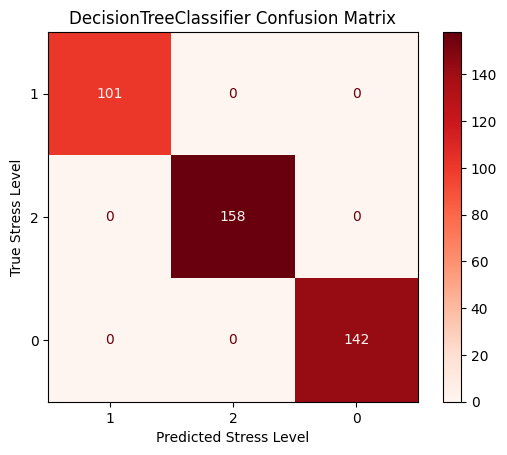

In [ ]:
features_test = stressLevelClassifier.features_test
targets_test = stressLevelClassifier.targets_test
targets_pred = decisionTreeClassifier.predict(features_test)

cm = confusion_matrix(targets_test, targets_pred)
class_labels = stress_lysis['Stress Level'].unique()
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_labels)

disp.plot(cmap = plt.cm.Reds)
plt.title('DecisionTreeClassifier Confusion Matrix')
plt.xlabel('Predicted Stress Level')
plt.ylabel('True Stress Level')
plt.show()